# Sampling on the Coupling Strength $D_j$

**Yuning Zhang, TU Delft, 2021.10.13**

Study the distribution of coupling strength $D_j$. The location of spin in a disordered ensemble are randomly generated, and the coupling strengths between the central spin and the bath are calculated from the locations.


In [1]:
using Plots
using LaTeXStrings
using Printf
using Statistics

In [2]:
include("SpinEnsemble.jl")

t_adaptive

In [14]:
"""
generate a set of coupling strength and visualize it
========================
Args:
    N: number of spin
    d: dimension
    a: scale of the distributed area, (the volume is a^d)
"""
function visual_coupling(N::Int, d::Int,a::Float64)
    sample=rand_bath_dipolar_coefs(N,d,a);
    bin_set=range(-20/a^d, 20/a^d, length = 60)
    fig=histogram(sample, bins = bin_set, xlabel=L"D_j", ylabel=L"\Delta P", norm=true, labels=:false)
    println("max: ",maximum(sample)," min: ",minimum(sample))
    println("avg: ", mean(sample),"std: ",std(sample))
    display(fig)
end;

The system is characterized by following parameters 
```
    N: number of spin
    d: dimension
    a: scale of the distributed area, (the volume is a^d)
```
The central spin is always distributed in zero point and the default z axis (background field) is $(0,0,1)$.

## Basic Distribution and corresponding FID

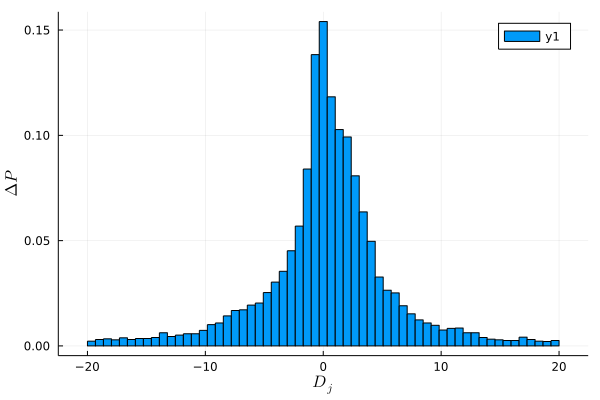

max: 6524.849177875605 min: -11568.84015019082
avg: 0.7142527610109435std: 161.17133248880972


In [15]:
visual_coupling(10^4,3,1.0)

### Varying spin density, see how large is the $D_j$ at top 5% (0.95)

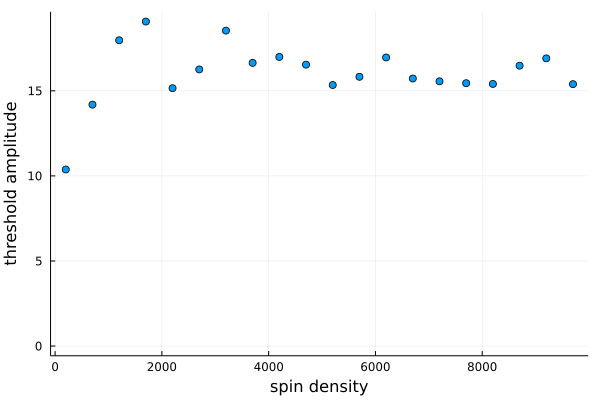

In [16]:
f_list=[100.0*n for n in 2:5:100]
h_s=map(x->transverse_threshold(0.95,x,3,1.0),f_list)
scatter(f_list, h_s,
yrange=[0,maximum(h_s)],
xlabel="spin density",
label=:false,
ylabel="threshold amplitude")

we can fix the density since the scale of $D_j$ doesn't vary with it.

### Varying area scale, see how large is the $D_j$  at top 5% (0.95)

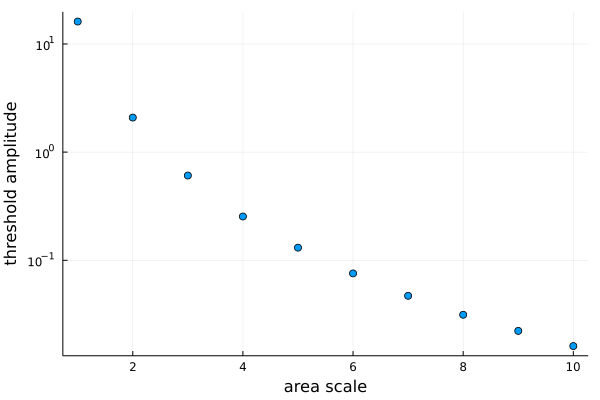

In [17]:
a_list=1:10
h_s=map(x->transverse_threshold(0.95,10^3,3,x),a_list)
scatter(a_list, h_s,
yaxis=:log,
label=:false,
xlabel="area scale",
ylabel="threshold amplitude")

**Plot the normalized distribution under different distributed area**

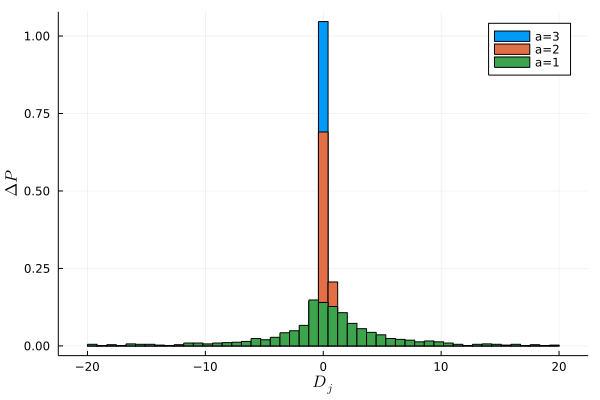

In [18]:
a_list=1:3
d=3
f=10^3
sample=map(x->rand_bath_dipolar_coefs(x^d*f,d,x),a_list)
bin_set=range(-20/1^d, 20/1^d, length = 50)
fig=histogram(reverse(sample), bins = bin_set,
xlabel=L"D_j", 
ylabel=L"\Delta P",
label=reverse(["a=1" "a=2" "a=3"]),
norm=:true)

The distribution is peaked more and more as the distributed area growing, since there are more spins in the bath that is far. 

In [46]:
"""
generate a sampling of beta with size M, visualize it
========================
Args:
    M: size of sampling
    N: number of spin
    d: dimension
    a: scale of the distributed area, (the volume is a^d)
"""
function visual_effective_beta(M::Int,N::Int, d::Int,a::Real; bin_num=60::Int, use_abs=:false)
    D_set=rand_bath_dipolar_coefs(N,d,a);
    sample=[beta_sampling(D_set) for i in 1:M]
    if use_abs 
        sample=abs.(sample)
    end
#     bin_set=range(-20/a^d, 20/a^d, length = 60)
    fig=histogram(sample, bins = bin_num, xlabel=L"\beta_p", ylabel=L"\Delta P", norm=true)
    println("max: ",maximum(sample)," min: ",minimum(sample))
    println("avg: ", mean(sample),"std: ",std(sample))
    display(fig)
end;

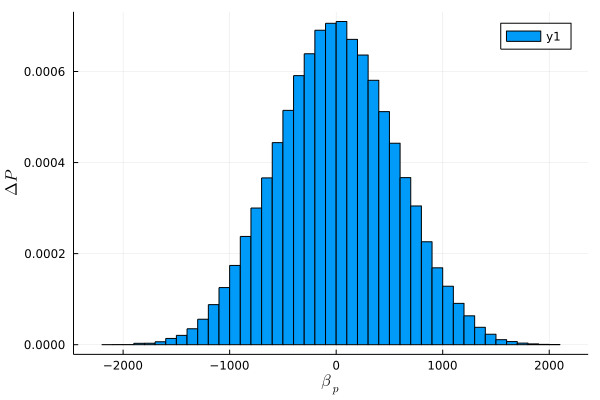

max: 2073.478783760145 min: -2112.8053891719255
avg: -0.19973339509740057std: 555.5640961013371


In [40]:
visual_effective_beta(Int(1e5),500,3,1.0,bin_num=40)

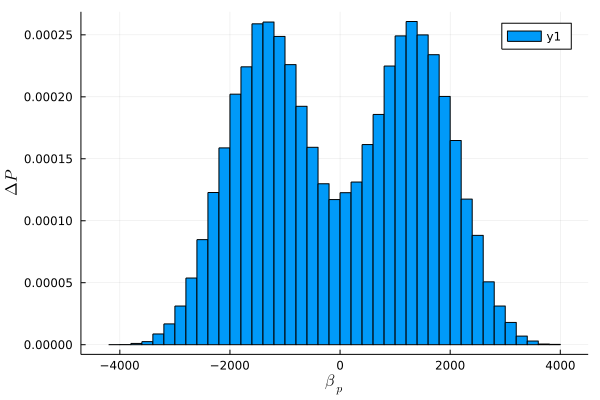

max: 3861.1439947060144 min: -4065.6440861674114
avg: -0.6669539998399673std: 1530.0662675665362


In [43]:
visual_effective_beta(Int(1e5),500,3,1.0,bin_num=40)

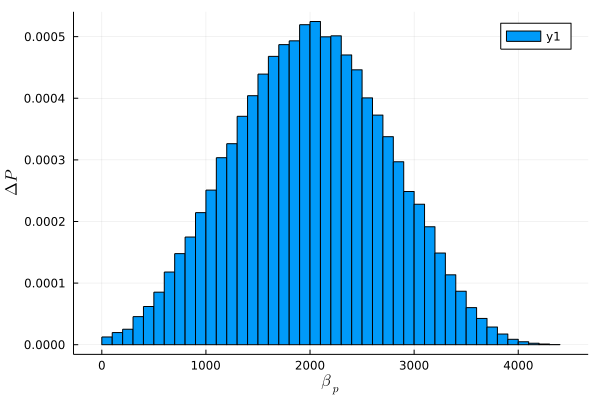

max: 4332.85659094023 min: 1.3765412760271678
avg: 2004.248788446277std: 731.231255181509


In [51]:
visual_effective_beta(Int(1e5),500,3,1.0,bin_num=40,use_abs=:true)

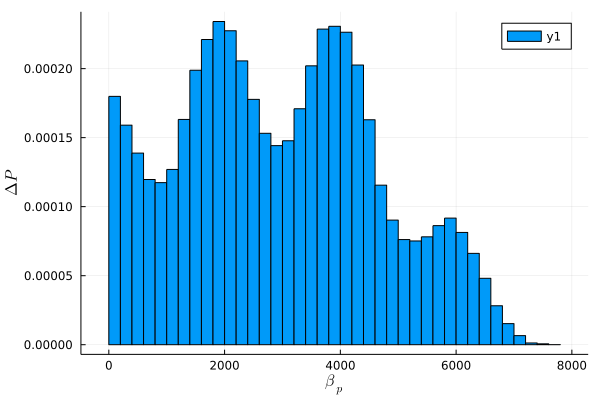

max: 7626.133066981367 min: 0.061693680695259934
avg: 2968.6435806149007std: 1705.9149361864756


In [55]:
visual_effective_beta(Int(1e5),500,3,1.0,bin_num=40,use_abs=:true)

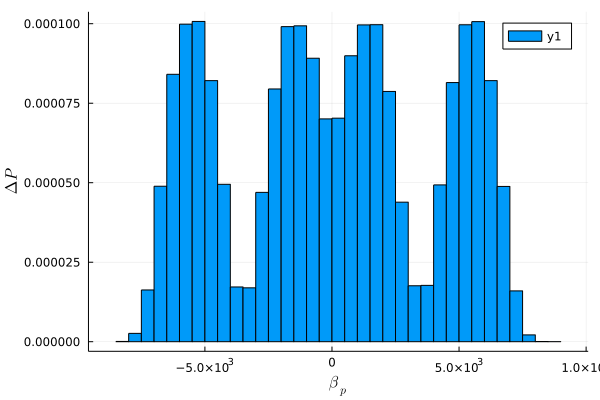

max: 8613.486815325086 min: -8296.884640857488
avg: -13.728936631258994std: 4115.772498106173


In [57]:
visual_effective_beta(Int(1e5),500,3,1.0,bin_num=40,use_abs=:false)

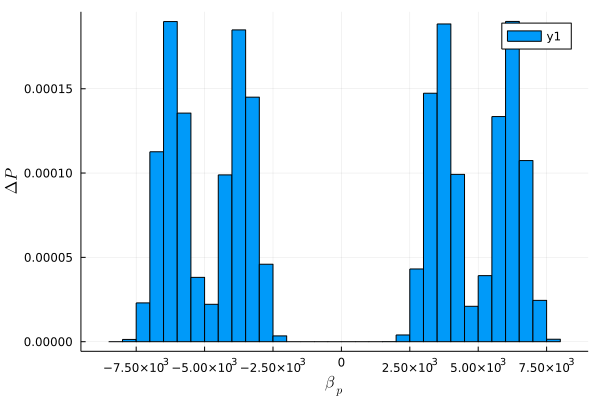

max: 7887.295553198419 min: -8093.331945032594
avg: -9.906362381314482std: 5105.471164084072


In [58]:
visual_effective_beta(Int(1e5),500,3,1.0,bin_num=40,use_abs=:false)

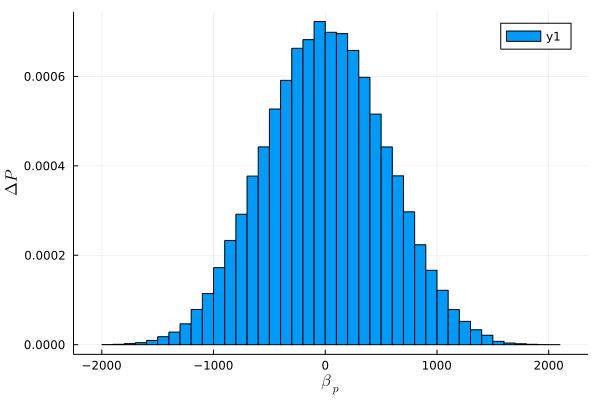

max: 2089.7897671469955 min: -1918.2261217231521
avg: 0.766159933828274std: 540.3833958751782


In [60]:
visual_effective_beta(Int(1e5),500,3,1.0,bin_num=40,use_abs=:false)